In [3]:
import numpy as np
from scipy.linalg import fractional_matrix_power

#Initialize the weights
W0 = np.array([[0.0020944, -0.00648353, 0.0084964, 0.00065057]])

W1 = np.array([
    [ 0.0097454, -0.00477003],
    [-0.01182214, -0.01196023],
    [ 0.01445716, -0.01005541],
    [ 0.01445809,  0.00727081],
])

# Adjacency matrix
A = np.array([
    [0, 1, 1, 1, 0, 0,],
    [1, 0, 1, 0, 0, 0,],
    [1, 1, 0, 0, 0, 0,],
    [1, 0, 0, 0, 1, 1,],
    [0, 0, 0, 1, 0, 1,],
    [0, 0, 0, 1, 1, 0,],
])

# Node features matrix
X = np.array([
    [0],
    [1],
    [2],
    [3],
    [4],
    [5],
])


def ReLu(x):
    return np.maximum(0,x)

#GCN layer
def GCN_forward(A,H,W):
    I = np.identity(A.shape[0]) # Create Identity Matrix
    A_hat = A + I # Add self-loop to A
    D = np.diag(np.sum(A_hat, axis=0)) # Create Degree Matrix of A
    D_half_norm = fractional_matrix_power(D, -0.5) # Calculate Square Inverse of D
    eq = D_half_norm.dot(A_hat).dot(D_half_norm).dot(H).dot(W)
    return ReLu(eq)


# Do forward propagation
H1 = GCN_forward(A,X,W0)
H2 = GCN_forward(A,H1,W1)

print('Features Representation from GCN output:\n', H2)

Features Representation from GCN output:
 [[0.00027758 0.        ]
 [0.00017298 0.        ]
 [0.00017298 0.        ]
 [0.00053017 0.        ]
 [0.00054097 0.        ]
 [0.00054097 0.        ]]


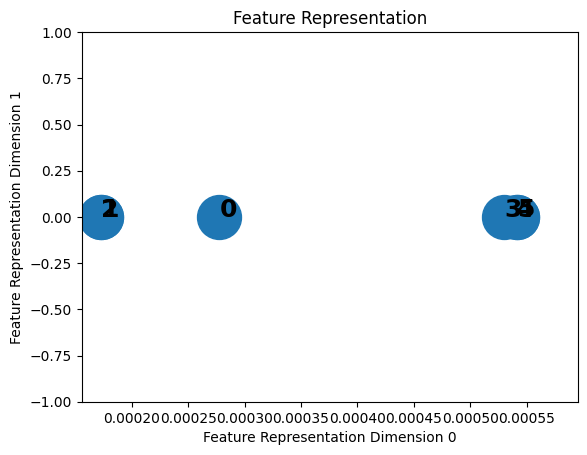

In [4]:
import matplotlib.pyplot as plt
def plot_features(H2):
    #Plot the features representation
    x = H2[:,0]
    y = H2[:,1]


    plt.scatter(x,y,1000)
    plt.xlim([np.min(x)*0.9, np.max(x)*1.1])
    plt.ylim([-1, 1])
    plt.xlabel('Feature Representation Dimension 0')
    plt.ylabel('Feature Representation Dimension 1')
    plt.title('Feature Representation')

    for i,row in enumerate(H2):
        str = "{}".format(i)
        plt.annotate(str, (row[0],row[1]),fontsize=18, fontweight='bold')

    plt.show()


plot_features(H2)

From the plot above, we can clearly see that there are 2 major groups, where the left group consists of nodes 0, 1, 2, and the right group consists of nodes 3, 4, 5. 

We can infer that the GCNs can learn the feature representations even without training or backpropagation, which is cool.